In [22]:
#import numpy as np
import sys
import os
sys.path.append(os.path.abspath(".."))

from NeuralNetwork import Feedforward_Neural_Network as nnm

import numpy as np
import os
import PIL
import PIL.Image
import tensorflow as tf 
import matplotlib.pyplot  as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import os
import joblib
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import seaborn as sns


In [23]:
import tensorflow as tf 

print('Available devices:')

for device in tf.config.list_physical_devices():
    print(device)

Available devices:
PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU')


In [24]:
# ======================#
# 1. Data Loading       #
# ======================#
def load_data():
    """Loading  MNIST dataset"""
    print("Loading MNIST dataset...")
    
    (x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

    return (x_train, y_train), (x_test, y_test)

(x_train, y_train), (x_test, y_test) = load_data()


Loading MNIST dataset...


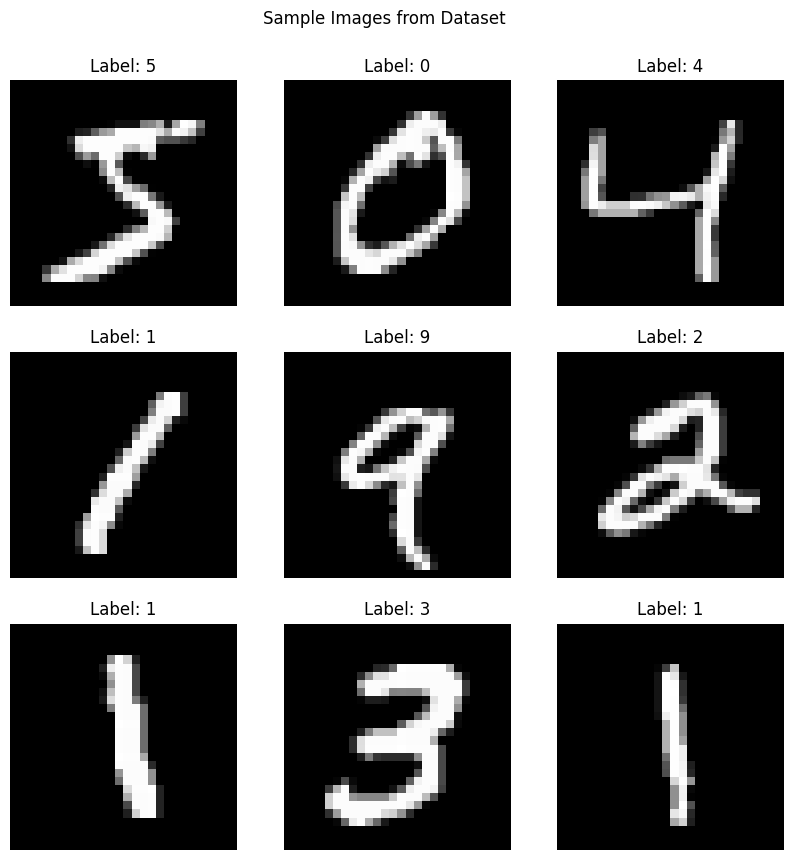

In [25]:
# ======================#
# 2. Visualize sample   #
# ======================#
def Visualize_sample(x,y,sample_Visualize_size=9):
    plt.figure(figsize=(10, 10))
    for i in range(sample_Visualize_size):
        plt.subplot(3, 3, i+1)
        plt.imshow(x[i], cmap='gray')
        plt.title(f"Label: {y[i]}")
        plt.axis('off')
    plt.suptitle('Sample Images from Dataset', y=0.95)
    plt.show() 
Visualize_sample(x_train, y_train)

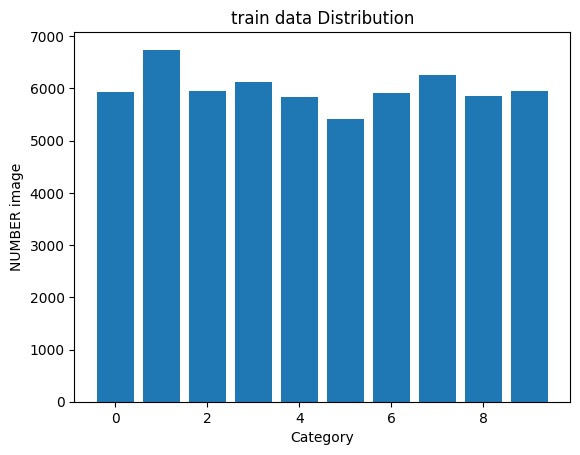

In [26]:

# ===================================#
# 3. train data Distribution         #
# ===================================#
def train_data_Distribution( y_train):
    unique,counte=np.unique(y_train, return_counts=True)
    plt.bar(unique, counte)
    plt.xlabel('Category')
    plt.ylabel('NUMBER image')
    plt.title('train data Distribution')
    plt.show()
    
train_data_Distribution( y_train)

In [27]:

# ===================================#
# 4. statistic calcul                #
# ===================================#
def valou_statistic(x_train):
    print("\n pixl statstic")
    print(f"mean {x_train.mean():.3f}")
    print(f"max {x_train.max():.3f}")
    print(f"min {x_train.min():.3f}")
    print(f"std {x_train.std():.3f}")
valou_statistic(x_train)


 pixl statstic
mean 33.318
max 255.000
min 0.000
std 78.567


In [28]:
# ======================#
# 5. Data Preprocessing #
# ======================#
def preporocess_trining_data(x_test,x_train):
    # normlayze data [0,255],[0,1]
    x_test_nom=x_test.astype('float32')/255
    x_train_nom=x_train.astype('float32')/255
    #flatten
    x_test_fatten=x_test_nom.reshape(x_test_nom.shape[0], -1)
    x_train_fatten=x_train_nom.reshape(x_train_nom.shape[0], -1)

    
    scaler = StandardScaler()
    
    
    x_train_preprocess=scaler.fit_transform(x_train_fatten)
    x_test_preprocess =scaler.transform(x_test_fatten)
    return x_train_preprocess,x_test_preprocess

x_train_preprocess,x_test_preprocess=preporocess_trining_data(x_test,x_train)
print(f"pros {x_train_preprocess[0]}")

    

pros [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
 -4.41807834e-03 -5.75481961e-03 -4.08251677e-03 -4.08251677e-03
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
 -4.08251677e-03 -4.70968848e-03 -8.79934616e-03 -1.15905590e-02
 -1.47589808e-02 -1.92848537e-02 -2.46717986e-02 -2.90710274e-02
 -3.05926576e-02 -3.11640128e-02 -3.19628716e-02 -3.02025359e-02
 -3.13102156e-02 -2.83833947e-02 -2.31191907e-02 -1.91666279e-02
 -1.67723019e-02 -1.09963603e-02 -8.32486060e-03 -4.38069366e-03
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00 -4.08251677e-03 -5.39534586e-03
 -8.52241181e-03 -1.

In [36]:
# ===============================#
# 6. Feature Extraction with PCA #
# ===============================#
def extract_features(x_train, x_test, variance=0.95):
    """Perform dimensionality reduction using PCA"""
    print("\n=== Feature Extraction with PCA ===")
    
    pca = PCA(n_components=variance, random_state=42)
    x_train_pca = pca.fit_transform(x_train)
    x_test_pca = pca.transform(x_test)
    
    # Save the PCA transformer
    joblib.dump(pca, 'models_FNN/pca_transformer.pkl')
    print("PCA transformer saved to 'models_FNN/pca_transformer.pkl'")

    print(f"Original number of features: {x_train.shape[1]}")
    print(f"Reduced number of features: {x_train_pca.shape[1]}")
    print(f"Explained variance ratio: {sum(pca.explained_variance_ratio_):.2f}")
    return x_train_pca,x_test_pca

x_train_pca,x_test_pca=extract_features(x_train_preprocess,x_test_preprocess)


=== Feature Extraction with PCA ===
PCA transformer saved to 'models_FNN/pca_transformer.pkl'
Original number of features: 784
Reduced number of features: 331
Explained variance ratio: 0.95


In [30]:
#=====================================================#
# 7. OneHotEncoder transforms a categorical feature   #
#=====================================================#
def encode_feature(y_train,sample_size=1000):
    encoder = OneHotEncoder(sparse_output=False)
    y_train_encoded = encoder.fit_transform(y_train[:sample_size].reshape(-1, 1))
    return y_train_encoded

In [31]:
# ======================#
# 8. nnm Model Training #
# ======================#
def train_model(x_train, y_train,sample_size_prcent=0.6):
    """Train nnm"""
    print("\n=== nnm Model Training ===")
    input_size=x_train.shape[1]#number colm 
    output_size=len(np.unique(y_train, return_counts=False))
    hidden_layers=[256, 128, 64, 32]
    model_nnm=nnm.NeuralNetwork(input_size=input_size, hidden_layers=hidden_layers, output_size=output_size ,activation_hidden='relu',activation_output='softmax')
    data_trin_size=len(y_test)
    sample_size=int(sample_size_prcent*data_trin_size)
    y_train_encoded=encode_feature(y_train,sample_size)

    loss_history=model_nnm.train(x_train[:sample_size],y_train_encoded ,epoch=3000,learn_rate=0.01,desplay_fr=1000)

    return model_nnm,loss_history
    

model_nnm,loss_history=train_model(x_train_pca,y_train,sample_size_prcent=0.6)


=== nnm Model Training ===
Epoch 0, Loss: 2.359989234567754
Epoch 1000, Loss: 0.21465013467937016
Epoch 2000, Loss: 0.08962043615236374


In [37]:
# =========================#
# 9. Model Saving Function #
# =========================#
def save_model(model, filename='models_FNN/mnist_nnm_model.pkl'):
    """Saves the trained model to disk with robust error handling"""
    try:
        # Extract directory path (if any)
        dir_path = os.path.dirname(filename)
        
        # Create directory only if path exists
        if dir_path and not os.path.exists(dir_path):
            os.makedirs(dir_path)
            
        # Save model
        joblib.dump(model, filename)
        print(f"❤️❤️❤️❤️ Model successfully saved to {os.path.abspath(filename)}")
        return True
        
    except Exception as e:
        print(f" 😢😢😢 Failed to save model to {filename}: {str(e)}")
        return False
save_model(model_nnm)#if you fil path add it here

❤️❤️❤️❤️ Model successfully saved to c:\Users\yasse\OneDrive\Desktop\jupyter\ml NN\reptository\examples\models_FNN\mnist_nnm_model.pkl


True

In [38]:
# =========================#
# 10. Model load  Function #
# =========================#
def load_model( filename='models_FNN/mnist_nnm_model.pkl'):
    try:

        loaded_model = joblib.load(filename)
        print(f"Model 👌👌👌 '{filename}' loaded successfully.")
        return loaded_model



    except FileNotFoundError:
        print(f" 😢😢😢Error: Model file '{filename}' not found.")
    except Exception as e:
        print(f"😅😅😅 An error occurred while loading the model: {e}")
model_nnm=load_model()

Model 👌👌👌 'models_FNN/mnist_nnm_model.pkl' loaded successfully.


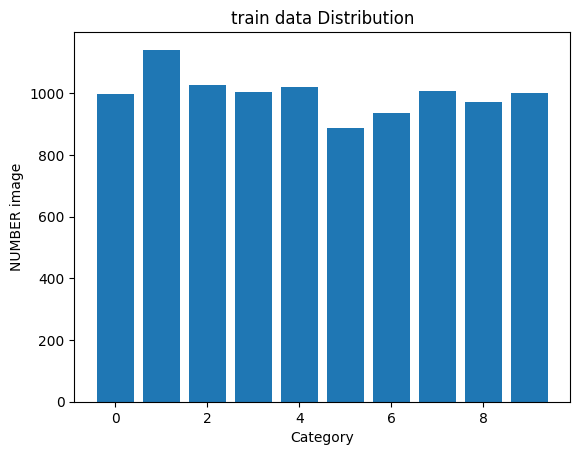

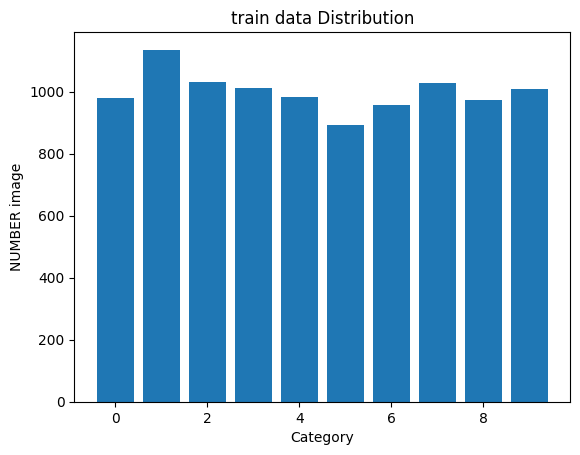


😍😍😍 Test Accuracy: 91.95%

 😂😂😂 Test mse: 81.49

 👌👌👌 Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.97      0.96       980
           1       0.97      0.98      0.97      1135
           2       0.92      0.91      0.92      1032
           3       0.92      0.91      0.92      1010
           4       0.90      0.94      0.92       982
           5       0.89      0.89      0.89       892
           6       0.95      0.93      0.94       958
           7       0.92      0.90      0.91      1028
           8       0.88      0.87      0.87       974
           9       0.90      0.89      0.89      1009

    accuracy                           0.92     10000
   macro avg       0.92      0.92      0.92     10000
weighted avg       0.92      0.92      0.92     10000


 😂😂😂Confusion Matrix


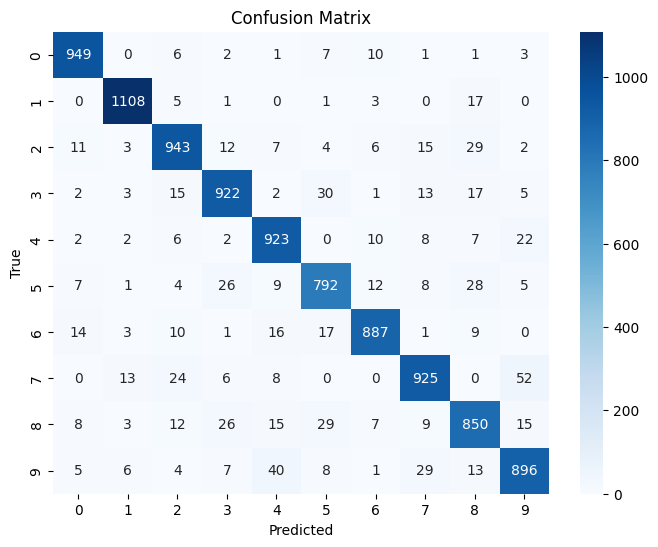

In [39]:
# ============================#
# 11. nnm Model test Evaluate  #
# ============================#
def test_model(model_nnm,x_test, y_test):
    predicte_value,_=model_nnm.predict(x_test)
    train_data_Distribution( predicte_value)
    train_data_Distribution(y_test)
    # Accuracy
    accuracy = accuracy_score(y_test, predicte_value)
    print(f"\n😍😍😍 Test Accuracy: {accuracy * 100:.2f}%")

    #MSE
    mse=model_nnm.MSE(y_test, predicte_value)
    print(f"\n 😂😂😂 Test mse: {mse**0.5:.2f}")




    # Classification Report
    print("\n 👌👌👌 Classification Report:")
    print(classification_report(y_test, predicte_value))

    
    # Confusion Matrix
    cm = confusion_matrix(y_test, predicte_value)
    print("\n 😂😂😂Confusion Matrix")
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=np.unique(y_test), yticklabels=np.unique(y_test))
    plt.xlabel("Predicted")
    plt.ylabel("True")
    plt.title("Confusion Matrix")
    plt.show()

   
test_model(model_nnm,x_test_pca,y_test)


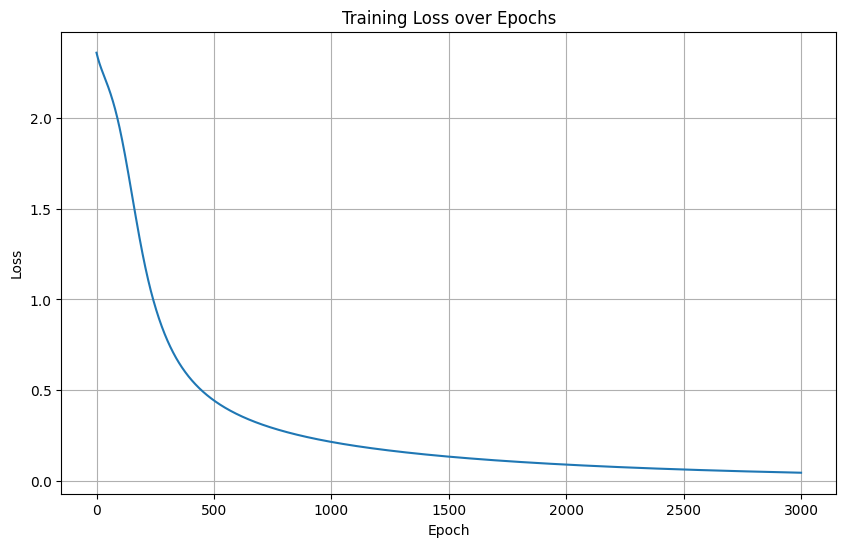

In [40]:
# ============================#
# 12. plot loss history       #
# ============================#
def loss_history_plot(loss_history):
    # Plot  loss history
    plt.figure(figsize=(10, 6))
    plt.plot(loss_history)
    plt.title('Training Loss over Epochs')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.grid(True)
    plt.show()
loss_history_plot(loss_history)